Dataset size: (96, 9)


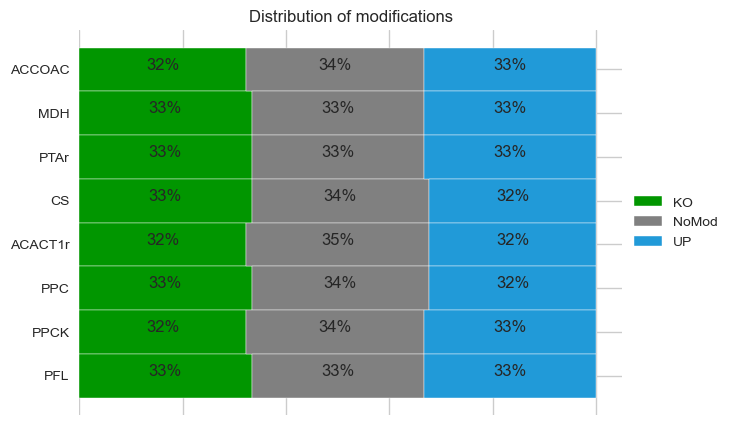

In [8]:
import sys

sys.path.append("../")

import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

from src import plot_multiomics
from straindesignxai.main import DataLoader

file_path = "../data/EDD_isoprenol_production.csv"
model_path = "../models/xgb_isoprenol.pkl"

input_var = ["ACCOAC", "MDH", "PTAr", "CS", "ACACT1r", "PPC", "PPCK", "PFL"]
response_var = ["Value"]

d = DataLoader(file_path, input_var, response_var)
plot_multiomics.plot_distribution_of_designs(d.df.drop("Value", axis=1))

In [9]:
# How many designs improve production over the WT
print(
    len(d.df[d.df["Value"] > d.df.loc["WT"]["Value"]]),
    "designs out of",
    len(d.df),
    "improve production over the WT",
)

11 designs out of 96 improve production over the WT


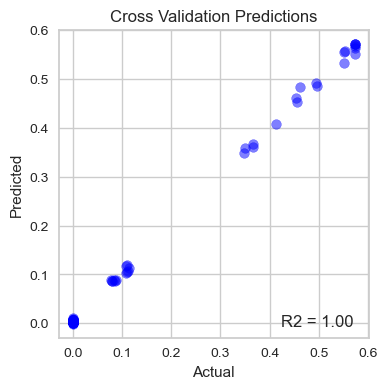

In [10]:
# load or train ml model
try:
    d.load_model(model_path)
except FileNotFoundError:
    d.train_xgb(n_iter=500)
    d.save_model(model_path)

d.plot_R2()

In [11]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
result = permutation_importance(d.model, d.X, d.y, n_repeats=10, random_state=0)

# Get the feature importances
importances = result.importances_mean

# Print the feature importances
for feature, importance in zip(d.X.columns, importances):
    print(f"{feature}: {importance}")


ACCOAC: 0.7234190941808046
MDH: 0.04895112972020325
PTAr: 0.008692201968989621
CS: 0.9042116002657001
ACACT1r: 0.7405018221719398
PPC: 0.519723122209738
PPCK: 0.0007705955125345554
PFL: 0.0004925289530546939


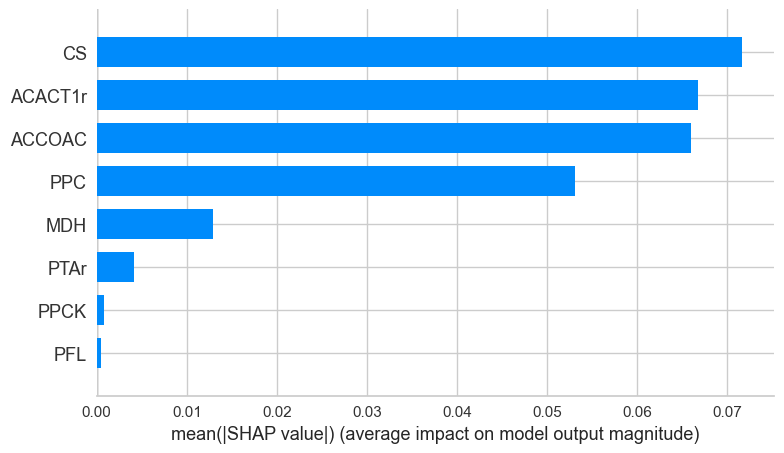

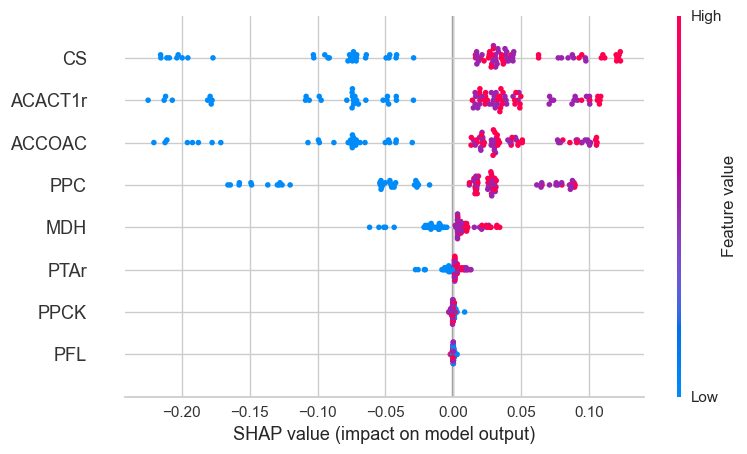

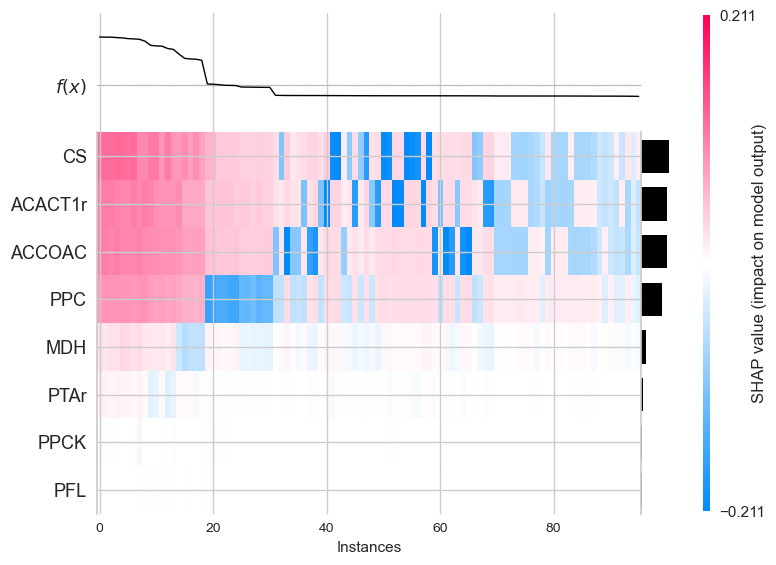

In [12]:
d.get_shap_values()

### Sort columns of `shap_df` by absolute `mean`/`man` shap values

In [13]:
# Sort columns of d.shap_df by mean absolute shap value
d.shap_df = d.shap_df.reindex(
    np.abs(d.shap_df).mean().sort_values(ascending=False).index, axis=1
)
np.abs(d.shap_df).describe().loc["max"]

CS         0.215608
ACACT1r    0.224800
ACCOAC     0.220575
PPC        0.166008
MDH        0.061654
PTAr       0.027843
PPCK       0.008366
PFL        0.002814
Name: max, dtype: float64

### Supervised clustering

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than

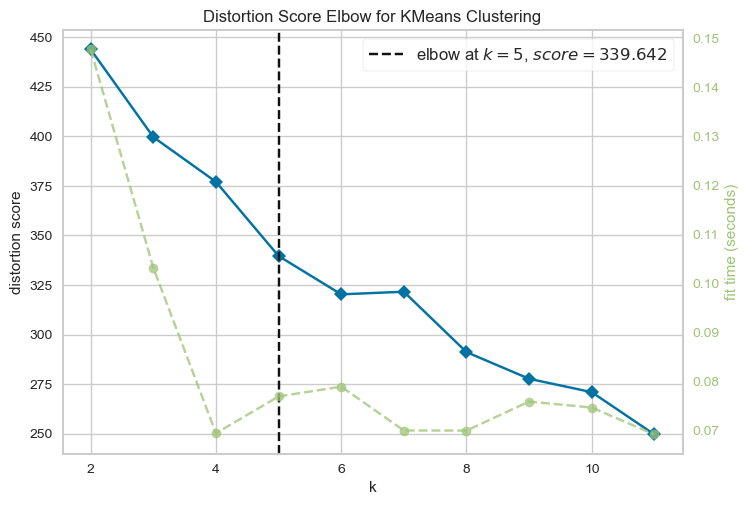

Optimal number of clusters: 5


KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


In [14]:
d.supervised_clustering()

In [15]:
d.df["pred"] = d.model.predict(d.df.drop(["Value", "cluster"], axis=1))
# find cluster with highest mean predicted value
top_cluster = (
    d.df.groupby("cluster").mean().sort_values("pred", ascending=False).index[0]
)
d.df[d.df["cluster"] == top_cluster]

,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Value,cluster,pred
Line Name,,,,,,,,,,,
Strain 2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.552101,0,0.554696
Strain 3,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.349196,0,0.358057
Strain 4,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.551849,0,0.533084
Strain 7,2.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,0.572648,0,0.571667
Strain 17,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,0.495097,0,0.492459
Strain 36,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.348023,0,0.348508
Strain 38,1.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,0.365749,0,0.366300
Strain 41,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.572648,0,0.564361
Strain 46,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,0.572648,0,0.572483


### Partial Dependence and Scatter Plots

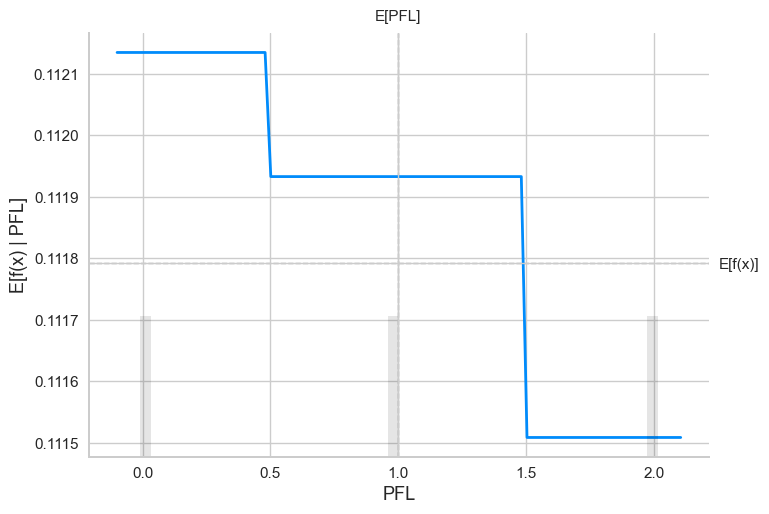

In [16]:
d.pdplot("PFL")

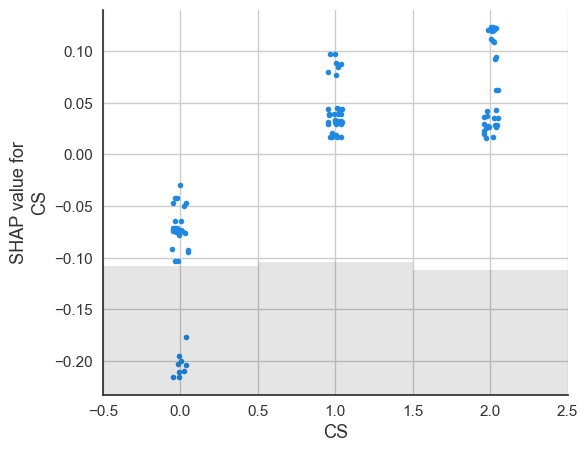

In [17]:
d.shap_scatter("CS")

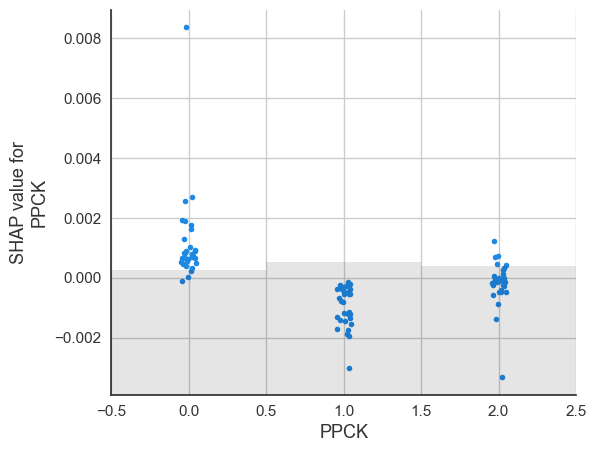

In [18]:
d.shap_scatter("PPCK")

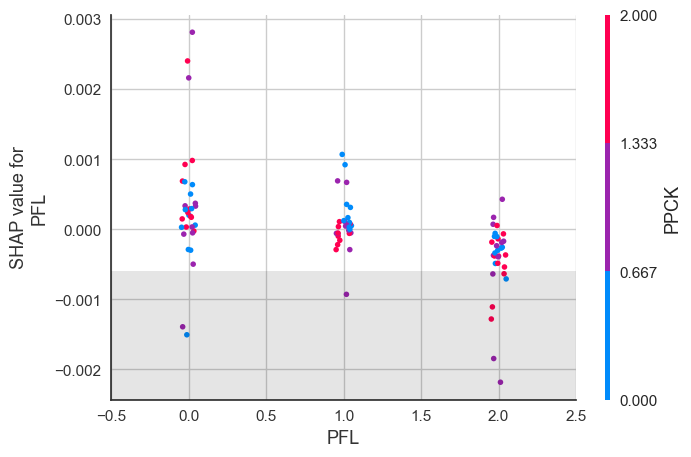

In [19]:
d.shap_scatter("PFL", "PPCK")

### Sampling

In [20]:
d.shap_df[d.shap_df["cluster"] == top_cluster]

,CS,ACACT1r,ACCOAC,PPC,MDH,PTAr,PPCK,PFL,cluster,Value
1,0.120350,0.106185,0.100437,0.085606,0.024727,0.008219,-0.001228,-0.001391,0,0.552101
2,0.092622,0.072286,0.077587,0.061536,-0.049853,-0.008365,-0.000473,0.000926,0,0.349196
3,0.097680,0.106512,0.097136,0.089756,0.020903,0.008044,-0.001552,0.002814,0,0.551849
6,0.120620,0.108635,0.105503,0.089387,0.022048,0.012534,0.001635,-0.000487,0,0.572648
16,0.110206,0.100570,0.094482,0.080033,0.021103,-0.025922,0.000903,-0.000708,0,0.495097
35,0.077344,0.070653,0.080728,0.064666,-0.054770,0.001891,-0.001951,-0.001845,0,0.348023
37,0.094671,0.073882,0.078850,0.065412,-0.061654,0.004646,-0.000019,-0.001281,0,0.365749
40,0.123180,0.100355,0.099731,0.086268,0.034206,0.009572,-0.001173,0.000429,0,0.572648
45,0.123044,0.107657,0.105912,0.087793,0.026719,0.010760,-0.001887,0.000692,0,0.572648
47,0.122194,0.100562,0.105505,0.089000,0.026154,0.013048,-0.001314,0.000670,0,0.572648


In [21]:
clstr_df = d.study_clusters("most_frequent", verbose=False)
clstr_df.sort_values("pred", ascending=False, inplace=True)
clstr_df = clstr_df.head(1)

bounds = pd.DataFrame(index=d.X.columns, columns=["lower", "upper"])
# bounds.loc['CS'] = [0, 2]
for col in d.X.columns:
    l_b = clstr_df[col].values[0] - 1
    u_b = clstr_df[col].values[0]
    bounds.loc[col] = [l_b, u_b]

# Gerate samples from a Latin hypercube generator
from scipy.stats import qmc

sampler = qmc.LatinHypercube(d=d.X.shape[1])
sample = sampler.random(100000)
LB = bounds["lower"].values.tolist()
UB = bounds["upper"].values.tolist()

sample_df = pd.DataFrame(qmc.scale(sample, LB, UB), columns=d.X.columns)
sample_df = sample_df.round(0).astype(int)
sample_df["pred"] = d.model.predict(sample_df)
# Drop duplicates
sample_df.drop_duplicates(inplace=True)
sample_df.sort_values("pred", ascending=False)

,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,pred
171,1,2,1,2,1,1,0,1,0.570705
454,1,2,1,2,1,1,0,2,0.569201
61,1,2,1,2,1,1,1,2,0.564361
524,1,2,1,2,1,1,1,1,0.562735
478,1,1,1,2,1,1,0,1,0.554392
...,...,...,...,...,...,...,...,...,...
73,0,1,1,2,0,0,0,1,-0.000839
52,0,1,1,2,0,0,1,1,-0.000839
218,0,1,1,2,0,0,0,2,-0.000839
265,0,1,0,2,0,0,1,2,-0.001067


In [22]:
bounds

,lower,upper
ACCOAC,0.0,1.0
MDH,1.0,2.0
PTAr,0.0,1.0
CS,1.0,2.0
ACACT1r,0.0,1.0
PPC,0.0,1.0
PPCK,0.0,1.0
PFL,1.0,2.0


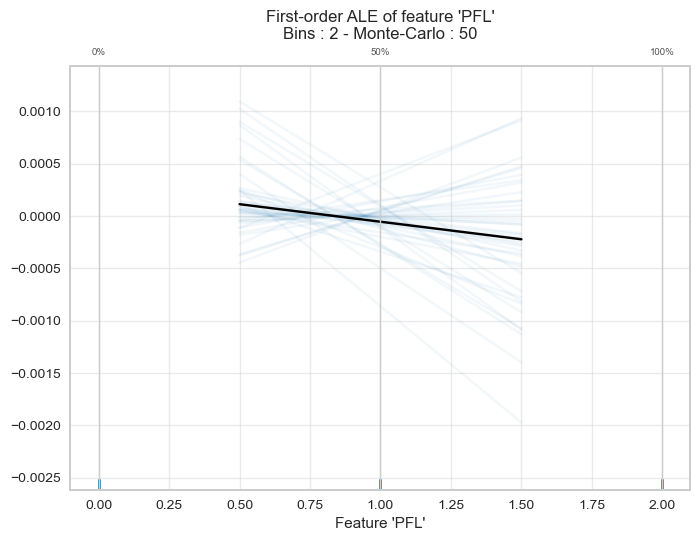

<Axes: title={'center': "First-order ALE of feature 'PFL'\nBins : 2 - Monte-Carlo : 50"}, xlabel="Feature 'PFL'">

In [23]:
from alepython import ale_plot

ale_plot(d.model, d.X, "PFL", monte_carlo=True)

## MCMC

In [24]:
def model_predict(X):
    # EX. np.array([1., 2., 2., 0., 2., 2., 0., 2.]).
    return d.model.predict(X.reshape(1, -1))

s_df = d.df[d.df["cluster"] == top_cluster]
s_df.head()

,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Value,cluster,pred
Line Name,,,,,,,,,,,
Strain 2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.552101,0,0.554696
Strain 3,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.349196,0,0.358057
Strain 4,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.551849,0,0.533084
Strain 7,2.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,0.572648,0,0.571667
Strain 17,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,0.495097,0,0.492459


In [53]:
import pymc as pm

with pm.Model() as model:
    # priors
    
    
    # likelihood
    
    # posterior
    

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
